## We want to predict laptop price based on hardware

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Laptop_Data.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

# Data Cleaning

In [3]:
df.describe()

,Screen_size,RAM,Storage_amount,original_price,after_discount,discount_percent
count,6256.000000,6256.000000,6.254000e+03,3.250000e+02,4.140000e+02,6256.000000
mean,15.344246,12.439578,2.192370e+06,4.524012e+07,4.512164e+07,0.047711
std,0.902921,9.122202,5.618973e+07,3.310885e+07,3.436404e+07,0.283193
min,10.000000,2.000000,1.024000e+03,1.100000e+07,1.090000e+07,0.000000
25%,15.600000,8.000000,1.024000e+03,2.375000e+07,2.205000e+07,0.000000
50%,15.600000,8.000000,2.621440e+05,3.530000e+07,3.440900e+07,0.000000
75%,15.600000,16.000000,1.311744e+06,5.788800e+07,5.688800e+07,0.000000
max,18.400000,128.000000,2.562622e+09,3.309990e+08,3.308890e+08,7.650000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             6256 non-null   object 
 1   Category           5808 non-null   object 
 2   Screen_size        6256 non-null   float64
 3   Screen_type        5655 non-null   object 
 4   Screen_resolution  6213 non-null   object 
 5   CPU_Brand          6255 non-null   object 
 6   CPU_series         6059 non-null   object 
 7   CPU_model          5911 non-null   object 
 8   RAM                6256 non-null   float64
 9   Storage_amount     6254 non-null   float64
 10  Storage_type       6251 non-null   object 
 11  Storage_info       1840 non-null   object 
 12  GPU_Brand          6245 non-null   object 
 13  GPU_Model          6105 non-null   object 
 14  OS                 3395 non-null   object 
 15  original_price     325 non-null    float64
 16  after_discount     414 n

In [5]:
df.shape

(6256, 20)

In [6]:
def clean_column(df, column):
    df[column] = df[column].replace({
        'SSDHDD': 'SSD, HDD',
        'SSDSATA': 'SSD, SATA',
        'SSDحافظه‌های هیبردی': 'SSD, Hybrid Storage',
        'SSDHDDحافظه‌های هیبردی': 'SSD, HDD, Hybrid Storage',
        'SSDSSHD': 'SSD, SSHD',
        'SSHDSATA': 'SSHD, SATA',
        'SSDSATAحافظه‌های هیبردی': 'SSD, SATA, Hybrid Storage',
        'حافظه‌های هیبردی':'Hybrid'
    })
    return df

df = clean_column(df, 'Storage_type')
df['Storage_type']=df['Storage_type'].replace(['SSD, Hybrid Storage','SSD, HDD, Hybrid Storage',
                                              'SSHD','SSD, SSHD'],'Hybrid')
df['Storage_type']=df['Storage_type'].replace('','eMMC')
df['Storage_type']=df['Storage_type'].replace(['SSD, HDD','Hybrid'],'Hybrid')
df['Storage_type']=df['Storage_type'].replace(['SSD, SATA, Hybrid Storage','SSHD, SATA'],'SSD, SATA')

In [7]:
df['Storage_type'].value_counts()

SSD          2283
Hybrid       1440
SATA         1370
HDD           874
SSD, SATA     277
eMMC            7
Name: Storage_type, dtype: int64

### selecting priced data
### selecting Common Storage type
### removing kg and making the weight column type float64

weight column is not cleaned yet
wait for that

In [8]:
df=df[df['after_discount'].notnull()]

df['Weight']=df['Weight'].str.replace('KG','').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 472
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             414 non-null    float64
 1   Category           411 non-null    object 
 2   Screen_size        414 non-null    float64
 3   Screen_type        341 non-null    object 
 4   Screen_resolution  398 non-null    object 
 5   CPU_Brand          414 non-null    object 
 6   CPU_series         414 non-null    object 
 7   CPU_model          380 non-null    object 
 8   RAM                414 non-null    float64
 9   Storage_amount     414 non-null    float64
 10  Storage_type       414 non-null    object 
 11  Storage_info       322 non-null    object 
 12  GPU_Brand          414 non-null    object 
 13  GPU_Model          406 non-null    object 
 14  OS                 197 non-null    object 
 15  original_price     325 non-null    float64
 16  after_discount     414 non

### removing some outliers of screen type column

In [9]:
df['Screen_type']=df['Screen_type'].replace(['13.6inch (diagonal) LED-backlit display with IPS technology','Full HD (1920×1080)','FULL HD','Full HD','فول اچ دی','FHD TN,Full HD TN','Full HD TN'],'fhd')
df['Screen_type']=df['Screen_type'].replace(['IPS-level Panel, LED Backlit ','IPS LED-backlit LCD','13.6inch (diagonal) LED-backlit display with IPS technology','13.3inch (diagonal) LED-backlit display with IPS technology','13.6inch (diagonal) LED-backlit display with IPS technology','Retina - IPS LED-backlit LCD','13.6inch (diagonal) LED-backlit display with IPS technology','Retina - IPS LED-backlit LCD'])
counts = df['Screen_type'].value_counts()
df=df[df['Screen_type'].isin(counts[counts > 3].index)]
df['Screen_type'].value_counts()

fhd                                              96
IPS                                              85
PixelSense™ Display                              46
FHD TN                                           18
TN                                               18
Liquid Retina XDR display                        12
OLED                                              9
WUXGA                                             8
15.3inch Liquid Retina display with True Tone     7
FHD IPS                                           5
TN Full HD                                        4
IPS-level Panel, LED Backlit                      4
Name: Screen_type, dtype: int64

In [10]:
df.head()

,Weight,Category,Screen_size,Screen_type,Screen_resolution,CPU_Brand,CPU_series,CPU_model,RAM,Storage_amount,Storage_type,Storage_info,GPU_Brand,GPU_Model,OS,original_price,after_discount,persian_info,full_info,discount_percent
0,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,524288.0,SSD,SSD NVMe,Apple,10 هسته ای,NaN,74000000.0,73000000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Midnight MLY43 M2 8GB 5...,1.35
1,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,524288.0,SSD,SSD NVMe,Apple,10 هسته ای,NaN,74300000.0,73300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Starlight MLY23 M2 8GB ...,1.35
2,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,262144.0,SSD,SSD NVMe,Apple,NaN,NaN,62300000.0,61300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Silver MLXY3 M2 8GB 256...,1.61
3,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,524288.0,SSD,SSD NVMe,Apple,10 هسته ای,NaN,75300000.0,74300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Space Gray MLXX3 M2 8GB...,1.33
4,1.75,نوت بوک (لپ تاپ),15.6,FHD TN,1080 * 1920,INTEL,Core i3,I3-1115G4,20.0,524288.0,SSD,SSD NVMe,Intel,UHD,Dos,NaN,17270000.0,لپ تاپ لنوو 15.6 اینچی مدل Ideapad 3 پردازنده ...,Ideapad 3 Core i3 1115G4 20GB 512GB SSD Intel ...,0.00


screen type is kinda cleaned

# removing outliers of weight column

In [11]:
weight=df['Weight'].value_counts()
df=df[df['Weight'].isin(weight[weight>1].index)]
df.head()

,Weight,Category,Screen_size,Screen_type,Screen_resolution,CPU_Brand,CPU_series,CPU_model,RAM,Storage_amount,Storage_type,Storage_info,GPU_Brand,GPU_Model,OS,original_price,after_discount,persian_info,full_info,discount_percent
0,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,524288.0,SSD,SSD NVMe,Apple,10 هسته ای,NaN,74000000.0,73000000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Midnight MLY43 M2 8GB 5...,1.35
1,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,524288.0,SSD,SSD NVMe,Apple,10 هسته ای,NaN,74300000.0,73300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Starlight MLY23 M2 8GB ...,1.35
2,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,262144.0,SSD,SSD NVMe,Apple,NaN,NaN,62300000.0,61300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Silver MLXY3 M2 8GB 256...,1.61
3,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,524288.0,SSD,SSD NVMe,Apple,10 هسته ای,NaN,75300000.0,74300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Space Gray MLXX3 M2 8GB...,1.33
4,1.75,نوت بوک (لپ تاپ),15.6,FHD TN,1080 * 1920,INTEL,Core i3,I3-1115G4,20.0,524288.0,SSD,SSD NVMe,Intel,UHD,Dos,NaN,17270000.0,لپ تاپ لنوو 15.6 اینچی مدل Ideapad 3 پردازنده ...,Ideapad 3 Core i3 1115G4 20GB 512GB SSD Intel ...,0.00


now weight is cleaned

### doing the same for screen size and resolution

In [12]:
sc_size=df['Screen_size'].value_counts()
df=df[df['Screen_size'].isin(sc_size[sc_size>1].index)]
#df
# df.shape

In [13]:
sc_res=df['Screen_resolution'].value_counts()
df=df[df['Screen_resolution'].isin(sc_res[sc_res>1].index)]
#df

In [14]:
df['Screen_type'] = df['Screen_type'].str.lower()

THIS WAS A LITTLE BIT TRICKY

### CPU MODEL CLEANING

In [15]:
cpu_model=df['CPU_model'].value_counts()
df=df[df['CPU_model'].isin(cpu_model[cpu_model>1].index)]
#df

cpu model is cleaned

### GPU column data cleaning

In [16]:
df['GPU_Brand']

0              Apple
1              Apple
2              Apple
3              Apple
4              Intel
           ...      
461    Nvidia Gforce
463    Nvidia Gforce
464    Nvidia Gforce
466    Nvidia Gforce
472            Intel
Name: GPU_Brand, Length: 263, dtype: object

In [17]:
df['GPU_Brand'].value_counts()

Nvidia Gforce    130
Intel             88
Apple             34
Nvidia             7
AMD                2
AMD Radeon         2
Name: GPU_Brand, dtype: int64

In [18]:
df['GPU_Brand']=df['GPU_Brand'].str.replace('AMD Radeon','AMD')
df['GPU_Brand']=df['GPU_Brand'].str.replace('Nvidia Gforce','Nvidia')


In [19]:
df['GPU_Model'] = df['GPU_Model'].str.lower().str.strip()
df['GPU_Model'] = df['GPU_Model'].str.replace('دارای', 'has')
df['GPU_Model'] = df['GPU_Model'].str.replace('هسته', 'core')
df['GPU_Model'] = df['GPU_Model'].str.replace('پردازش گرافیکی', '')
df['GPU_Model'] = df['GPU_Model'].str.replace('ای', '')
df['GPU_Model'] = df['GPU_Model'].str.replace('۵۵۰', '550')
df['GPU_Model'] = df['GPU_Model'].replace(['uhd','uhd graphics', 'intel® hd graphics','intel uhd graphic','intel® uhd graphics','intel uhd graphics','intel'], 'uhd')
df['GPU_Model'] = df['GPU_Model'].replace(['nvidia geforce mx330', 'geforce® mx330'], 'geforce mx330')
df['GPU_Model'] = df['GPU_Model'].replace(['nvidia® geforce rtx™3050 ti  laptop gpu with 4gb gddr6','geforce rtx3050', 'rtx 3050','rtx 3050 gddr6','nvidia geforce rtx 3050','rtx™ a2000'], 'rtx 3050')
df['GPU_Model'] = df['GPU_Model'].replace(['intel® iris® xe', 'intel iris xe graphics'], 'iris xe graphics')
df['GPU_Model'] = df['GPU_Model'].replace(['mx350', 'nvidia geforce mx350'], 'geforce mx350')
df['GPU_Model'] = df['GPU_Model'].replace(['geforce mx550 gddr6 - 2gb', 'mx550 gddr6','geforce mx550','nvida mx 550'], 'mx550 gddr6')
df['GPU_Model'] = df['GPU_Model'].replace(['iris xe graphics', 'intel iris plus graphics','intel iris','intel® iris™ plus graphics'], 'iris plus')
df['GPU_Model'] = df['GPU_Model'].replace(['radeon rx6600m gdd6', 'amd radeon'], 'radeon rx6600m')
df['GPU_Model'] = df['GPU_Model'].replace(['nvidia geforce mx450', 'mx450'], 'geforce mx450')
df['GPU_Model'] = df['GPU_Model'].replace(['geforce rtx 3060 gddr6', 'geforce rtx 3060'], 'geforce rtx 3060')
df['GPU_Model'] = df['GPU_Model'].replace(['gtx 1650 with max-q design', 'nvidia geforce gtx 1650'], 'geforce rtx 3060')
df['GPU_Model'] = df['GPU_Model'].replace(['geforce rtx 4060', 'geforce rtx4060 gddr6'], 'geforce rtx 4060')
df['GPU_Model'] = df['GPU_Model'].replace(['has 19 core','has 16 core'],'M2 Pro')
df['GPU_Model'] = df['GPU_Model'].replace(['10-core gpu','10 core','10core gpu16-core neural engine100gb/s memory bandwidth','10 core'],'M2 10')
df['GPU_Model'] = df['GPU_Model'].replace(['14core gpu16core neural engine200gb/s memory bandwidth','has 16 core','16core gpu16core neural engine200gb/s memory bandwidth'],'M 16')
df['GPU_Model'] = df['GPU_Model'].replace('has 38 core','M2 Max')
df['GPU_Model'] = df['GPU_Model'].str.replace(' ', '')


In [20]:
df['GPU_Model'].value_counts().head(10)

uhd               58
geforcemx330      36
rtx3050           33
irisplus          29
mx550gddr6        14
geforcemx350      13
M210              11
geforcemx450       9
geforcertx3060     9
M16                7
Name: GPU_Model, dtype: int64

In [21]:
df['GPU_Model'].isnull().sum()

3

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 472
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             263 non-null    float64
 1   Category           263 non-null    object 
 2   Screen_size        263 non-null    float64
 3   Screen_type        263 non-null    object 
 4   Screen_resolution  263 non-null    object 
 5   CPU_Brand          263 non-null    object 
 6   CPU_series         263 non-null    object 
 7   CPU_model          263 non-null    object 
 8   RAM                263 non-null    float64
 9   Storage_amount     263 non-null    float64
 10  Storage_type       263 non-null    object 
 11  Storage_info       215 non-null    object 
 12  GPU_Brand          263 non-null    object 
 13  GPU_Model          260 non-null    object 
 14  OS                 126 non-null    object 
 15  original_price     214 non-null    float64
 16  after_discount     263 non

In [23]:
df['GPU_Model'].fillna('geforcemx330',inplace=True)

## storage amount

In [24]:
df['Storage_amount'] = df['Storage_amount'].astype(str).str.strip()
df['Storage_amount'] = df['Storage_amount'].replace('131072.0', '128')
df['Storage_amount'] = df['Storage_amount'].replace('1311744.0', '128')
df['Storage_amount'] = df['Storage_amount'].replace('2622464.0', '256')
df['Storage_amount'] = df['Storage_amount'].replace('262144.0', '256')
df['Storage_amount'] = df['Storage_amount'].replace('524288.0', '528')
df['Storage_amount'] = df['Storage_amount'].replace(['524288.0','5243904.0'], '528')

df['Storage_amount'] = df['Storage_amount'].astype('float64')


In [25]:
df['Storage_amount'].value_counts()

528.0     110
1024.0     82
256.0      61
128.0       6
2048.0      4
Name: Storage_amount, dtype: int64

In [26]:
df.shape

(263, 20)

# Machine Learning is about to begin 

In [28]:
X=df.drop(columns=['Storage_info','OS','original_price','after_discount',
                  'persian_info','full_info','discount_percent'])

In [29]:
X

,Weight,Category,Screen_size,Screen_type,Screen_resolution,CPU_Brand,CPU_series,CPU_model,RAM,Storage_amount,Storage_type,GPU_Brand,GPU_Model
0,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,SSD,Apple,10core
1,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,SSD,Apple,10core
2,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,256.0,SSD,Apple,geforcemx330
3,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,SSD,Apple,10core
4,1.75,نوت بوک (لپ تاپ),15.6,fhd tn,1080 * 1920,INTEL,Core i3,I3-1115G4,20.0,528.0,SSD,Intel,uhd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,1.70,نوت بوک (لپ تاپ),15.6,fhd,1080 * 1920,INTEL,Core i7,i7 1165G7,16.0,256.0,Hybrid,Nvidia,geforcemx450
463,1.70,نوت بوک (لپ تاپ),15.6,tn full hd,1080 * 1920,INTEL,Core i5,i5-1135G7,16.0,256.0,Hybrid,Nvidia,geforcemx450
464,1.70,نوت بوک (لپ تاپ),15.6,tn full hd,1080 * 1920,INTEL,Core i5,i5-1135G7,8.0,256.0,Hybrid,Nvidia,geforcemx450
466,2.20,نوت بوک (لپ تاپ),15.6,ips,1080 * 1920,INTEL,Core i5,i5-11300H,8.0,256.0,SSD,Nvidia,geforcertx3060


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 472
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             263 non-null    float64
 1   Category           263 non-null    object 
 2   Screen_size        263 non-null    float64
 3   Screen_type        263 non-null    object 
 4   Screen_resolution  263 non-null    object 
 5   CPU_Brand          263 non-null    object 
 6   CPU_series         263 non-null    object 
 7   CPU_model          263 non-null    object 
 8   RAM                263 non-null    float64
 9   Storage_amount     263 non-null    float64
 10  Storage_type       263 non-null    object 
 11  GPU_Brand          263 non-null    object 
 12  GPU_Model          263 non-null    object 
dtypes: float64(4), object(9)
memory usage: 28.8+ KB


In [31]:
y=df['after_discount']
print(y.mean())
y.shape

44144612.16730038


(263,)

In [32]:
df

,Weight,Category,Screen_size,Screen_type,Screen_resolution,CPU_Brand,CPU_series,CPU_model,RAM,Storage_amount,Storage_type,Storage_info,GPU_Brand,GPU_Model,OS,original_price,after_discount,persian_info,full_info,discount_percent
0,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,SSD,SSD NVMe,Apple,10core,NaN,74000000.0,73000000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Midnight MLY43 M2 8GB 5...,1.35
1,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,SSD,SSD NVMe,Apple,10core,NaN,74300000.0,73300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Starlight MLY23 M2 8GB ...,1.35
2,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,256.0,SSD,SSD NVMe,Apple,geforcemx330,NaN,62300000.0,61300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Silver MLXY3 M2 8GB 256...,1.61
3,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,SSD,SSD NVMe,Apple,10core,NaN,75300000.0,74300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Space Gray MLXX3 M2 8GB...,1.33
4,1.75,نوت بوک (لپ تاپ),15.6,fhd tn,1080 * 1920,INTEL,Core i3,I3-1115G4,20.0,528.0,SSD,SSD NVMe,Intel,uhd,Dos,NaN,17270000.0,لپ تاپ لنوو 15.6 اینچی مدل Ideapad 3 پردازنده ...,Ideapad 3 Core i3 1115G4 20GB 512GB SSD Intel ...,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,1.70,نوت بوک (لپ تاپ),15.6,fhd,1080 * 1920,INTEL,Core i7,i7 1165G7,16.0,256.0,Hybrid,SSD NVMe,Nvidia,geforcemx450,Dos,33750000.0,33550000.0,لپ تاپ لنوو 15.6 اینچی مدل ThinkBook 15 پردازن...,ThinkBook 15 Core i7 1165G7 16GB 1TB 256GB SSD...,0.59
463,1.70,نوت بوک (لپ تاپ),15.6,tn full hd,1080 * 1920,INTEL,Core i5,i5-1135G7,16.0,256.0,Hybrid,SSD NVMe,Nvidia,geforcemx450,Dos,29650000.0,29550000.0,لپ تاپ لنوو 15.6 اینچی مدل ThinkBook 15 پردازن...,ThinkBook 15 Core i5 1135G7 16GB 1TB 256GB SSD...,0.34
464,1.70,نوت بوک (لپ تاپ),15.6,tn full hd,1080 * 1920,INTEL,Core i5,i5-1135G7,8.0,256.0,Hybrid,SSD NVMe,Nvidia,geforcemx450,Dos,28750000.0,28550000.0,لپ تاپ لنوو 15.6 اینچی مدل ThinkBook 15 پردازن...,ThinkBook 15 Core i5 1135G7 8GB 1TB 256GB SSD ...,0.70
466,2.20,نوت بوک (لپ تاپ),15.6,ips,1080 * 1920,INTEL,Core i5,i5-11300H,8.0,256.0,SSD,SSD NVMe,Nvidia,geforcertx3060,NaN,NaN,33500000.0,لپ تاپ لنوو 15.6 اینچی مدل Ideapad Gaming 3 پر...,IdeaPad Gaming 3 Core i5-11300H 8GB 256GB SSD ...,0.00


# Model 

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=7, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('*'*50)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
print('*'*50)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print('*'*50)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
print('*'*50)
print('*'*50)


# Predictions 
y_train_pred = model.predict(X_train)

# training accuracy
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training Root Mean Squared Error: {train_rmse}')
print(f'Training R-squared: {train_r2}')
print('*'*50)
print('*'*50)

# testing accuracy
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing Root Mean Squared Error: {test_rmse}')
print(f'Testing R-squared: {test_r2}')

Mean Squared Error: 22003452016985.797
**************************************************
Root Mean Squared Error: 4690783.731636516
**************************************************
Mean Absolute Error (MAE): 3006605.82010582
**************************************************
R-squared: 0.9671511928120043
**************************************************
**************************************************
Training Mean Squared Error: 19284076159234.516
Training Root Mean Squared Error: 4391363.815403424
Training R-squared: 0.9810746059927266
**************************************************
**************************************************
Testing Mean Squared Error: 22003452016985.797
Testing Root Mean Squared Error: 4690783.731636516
Testing R-squared: 0.9671511928120043


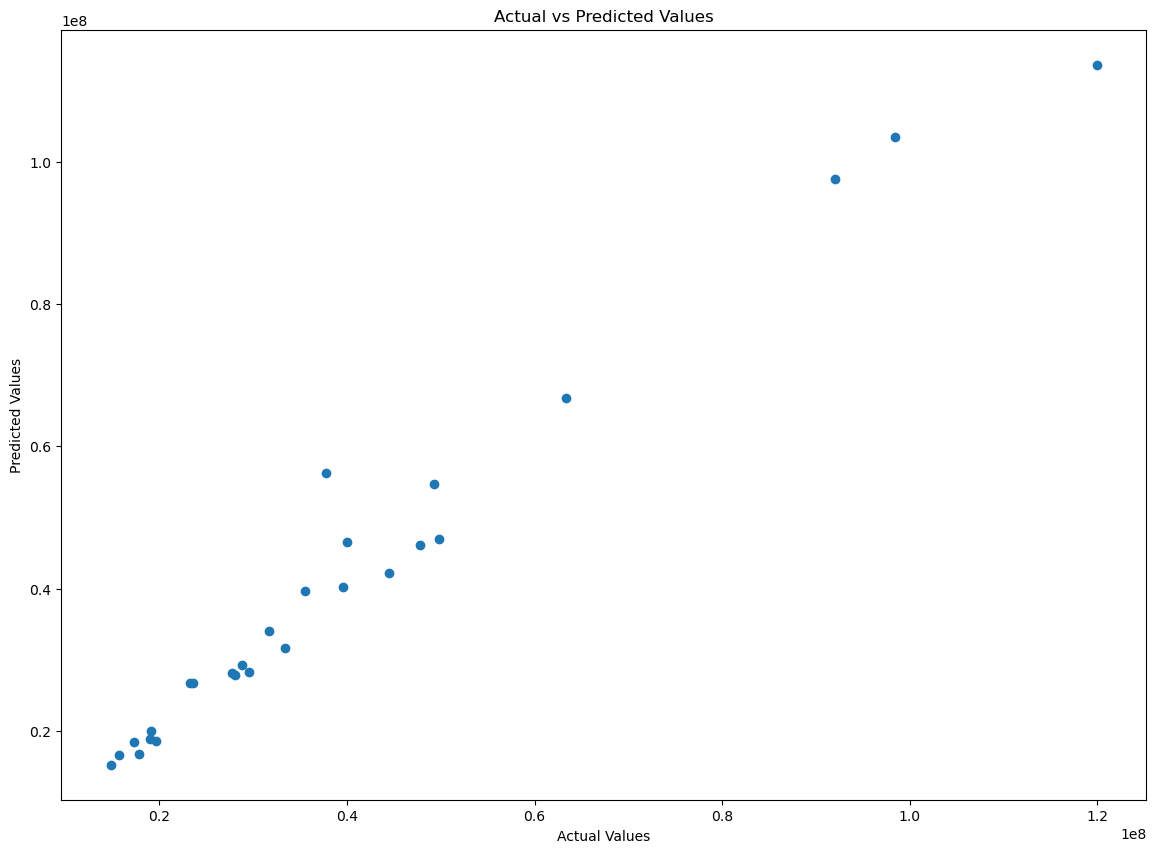

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


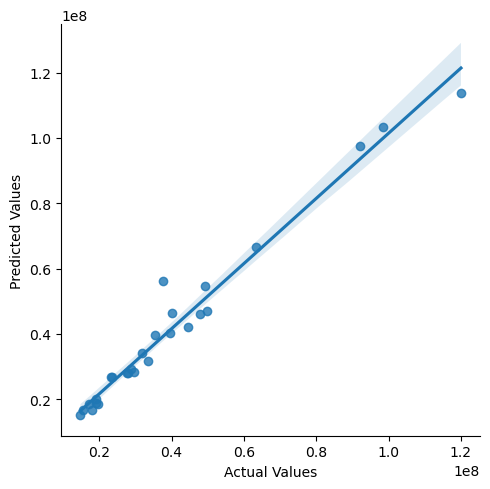

In [35]:
import seaborn as sns

df1 = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

sns.lmplot(data=df1, x='Actual Values', y='Predicted Values')


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Preprocessing
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X = X.fillna(X.mean())

# Initialize variables
best_mse = np.inf
best_rmse = np.inf
best_mae = np.inf
best_r2 = 0
best_test_size = 0
best_n_estimators = 0

# Loop over possible test sizes and n_estimators
for test_size in np.arange(0.1, 1.0, 0.1):
    for n_estimators in range(1, 101):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Train the model
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Check if this is the best model so far
        if mse < best_mse and rmse < best_rmse and mae < best_mae and r2 > best_r2:
            best_mse = mse
            best_rmse = rmse
            best_mae = mae
            best_r2 = r2
            best_test_size = test_size
            best_n_estimators = n_estimators

print(f'Best Mean Squared Error: {best_mse}')
print(f'Best Root Mean Squared Error: {best_rmse}')
print(f'Best Mean Absolute Error: {best_mae}')
print(f'Best R-squared: {best_r2}')
print(f'Best Test Size: {best_test_size}')
print(f'Best Number of Estimators: {best_n_estimators}')


Best Mean Squared Error: 20461572813564.29
Best Root Mean Squared Error: 4523447.00572078
Best Mean Absolute Error: 2677864.188080264
Best R-squared: 0.9637020385725253
Best Test Size: 0.2
Best Number of Estimators: 25


In [37]:
columns=['Weight', 'Category', 'Screen_size', 'Screen_type', 'Screen_resolution',
       'CPU_Brand', 'CPU_series', 'CPU_model', 'RAM', 'Storage_amount',
       'Storage_type', 'GPU_Brand', 'GPU_Model']
y_pred_all = model.predict(X[columns])

In [40]:
# Make predictions on the entire DataFrame
# Add the predictions as a new column to the DataFrame
df['predicted_price'] = y_pred_all


In [41]:
df

,Weight,Category,Screen_size,Screen_type,Screen_resolution,CPU_Brand,CPU_series,CPU_model,RAM,Storage_amount,...,Storage_info,GPU_Brand,GPU_Model,OS,original_price,after_discount,persian_info,full_info,discount_percent,predicted_price
0,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,...,SSD NVMe,Apple,10core,NaN,74000000.0,73000000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Midnight MLY43 M2 8GB 5...,1.35,76131660.0
1,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,...,SSD NVMe,Apple,10core,NaN,74300000.0,73300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Starlight MLY23 M2 8GB ...,1.35,76131660.0
2,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,256.0,...,SSD NVMe,Apple,geforcemx330,NaN,62300000.0,61300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Silver MLXY3 M2 8GB 256...,1.61,71643020.0
3,1.24,مک‌بوک,13.6,fhd,1600 * 2560,Apple,M2,8core CPU with 4 performance cores and 4 effic...,8.0,528.0,...,SSD NVMe,Apple,10core,NaN,75300000.0,74300000.0,لپ تاپ اپل 13.6 اینچی مدل Apple MacBook Air 20...,Apple MacBook Air 2022 Space Gray MLXX3 M2 8GB...,1.33,76131660.0
4,1.75,نوت بوک (لپ تاپ),15.6,fhd tn,1080 * 1920,INTEL,Core i3,I3-1115G4,20.0,528.0,...,SSD NVMe,Intel,uhd,Dos,NaN,17270000.0,لپ تاپ لنوو 15.6 اینچی مدل Ideapad 3 پردازنده ...,Ideapad 3 Core i3 1115G4 20GB 512GB SSD Intel ...,0.00,17252780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,1.70,نوت بوک (لپ تاپ),15.6,fhd,1080 * 1920,INTEL,Core i7,i7 1165G7,16.0,256.0,...,SSD NVMe,Nvidia,geforcemx450,Dos,33750000.0,33550000.0,لپ تاپ لنوو 15.6 اینچی مدل ThinkBook 15 پردازن...,ThinkBook 15 Core i7 1165G7 16GB 1TB 256GB SSD...,0.59,34696902.5
463,1.70,نوت بوک (لپ تاپ),15.6,tn full hd,1080 * 1920,INTEL,Core i5,i5-1135G7,16.0,256.0,...,SSD NVMe,Nvidia,geforcemx450,Dos,29650000.0,29550000.0,لپ تاپ لنوو 15.6 اینچی مدل ThinkBook 15 پردازن...,ThinkBook 15 Core i5 1135G7 16GB 1TB 256GB SSD...,0.34,31735977.5
464,1.70,نوت بوک (لپ تاپ),15.6,tn full hd,1080 * 1920,INTEL,Core i5,i5-1135G7,8.0,256.0,...,SSD NVMe,Nvidia,geforcemx450,Dos,28750000.0,28550000.0,لپ تاپ لنوو 15.6 اینچی مدل ThinkBook 15 پردازن...,ThinkBook 15 Core i5 1135G7 8GB 1TB 256GB SSD ...,0.70,31793195.0
466,2.20,نوت بوک (لپ تاپ),15.6,ips,1080 * 1920,INTEL,Core i5,i5-11300H,8.0,256.0,...,SSD NVMe,Nvidia,geforcertx3060,NaN,NaN,33500000.0,لپ تاپ لنوو 15.6 اینچی مدل Ideapad Gaming 3 پر...,IdeaPad Gaming 3 Core i5-11300H 8GB 256GB SSD ...,0.00,39395280.0


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=25, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('*'*50)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
print('*'*50)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print('*'*50)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
print('*'*50)
print('*'*50)


# Predictions 
y_train_pred = model.predict(X_train)

# training accuracy
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training Root Mean Squared Error: {train_rmse}')
print(f'Training R-squared: {train_r2}')
print('*'*50)
print('*'*50)

# testing accuracy
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing Root Mean Squared Error: {test_rmse}')
print(f'Testing R-squared: {test_r2}')

Mean Squared Error: 20461572813564.29
**************************************************
Root Mean Squared Error: 4523447.00572078
**************************************************
Mean Absolute Error (MAE): 2677864.188080264
**************************************************
R-squared: 0.9637020385725253
**************************************************
**************************************************
Training Mean Squared Error: 9342640618041.201
Training Root Mean Squared Error: 3056573.3457650254
Training R-squared: 0.9914387436300776
**************************************************
**************************************************
Testing Mean Squared Error: 20461572813564.29
Testing Root Mean Squared Error: 4523447.00572078
Testing R-squared: 0.9637020385725253


In [44]:
df.to_csv('ML Friendly data.csv')